In [15]:
import pandas as pd

file_path = '/Users/sheerinraina/Downloads/311 Service Request 2024 Q1.csv'
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip', encoding='utf-8')


severity_scores = {
    # severity 1: needs immediate attention (life threatening, major safety hazards)
    'Animal-Abuse': 1, 'Asbestos': 1, 'Drug Activity': 1, 'Electrical': 1, 'Emergency Response Team': 1,
    'Food Poisoning': 1, 'Hazardous Materials': 1, 'Lead': 1, 'Oil or Gas Spill': 1, 'Radioactive Material': 1,
    'Building Condition': 1, 'Construction Safety': 1, 'Scaffold Safety': 1, 'Water System': 1, 'ELECTRIC': 1,
    
    # severity 2: high (health risks, major infrastructure issues)
    'Air Quality': 2, 'Boilers': 2, 'Building/Use': 2, 'Cranes and Derricks': 2, 'Dead Animal': 2,
    'Drinking Water': 2, 'HEAT/HOT WATER': 2, 'Indoor Sewage': 2, 'Industrial Waste': 2, 'Mold': 2,
    'Real Time Enforcement': 2, 'Rodent': 2, 'Sewer': 2, 'Traffic Signal Condition': 2, 'UNSANITARY CONDITION': 2,
    'Water Quality': 2, 'SAFETY': 2, 'Elevator': 2, 'Gas or Oil Spill': 2,
    
    # severity 3: medium (poor infrastructure, moderate safety issues)
    'Blocked Driveway': 3, 'Bridge Condition': 3, 'Construction Lead Dust': 3, 'Curb Condition': 3,
    'Dead/Dying Tree': 3, 'Encampment': 3, 'Highway Condition': 3, 'Homeless Person': 3, 'Illegal Dumping': 3,
    'Illegal Parking': 3, 'Indoor Air Quality': 3, 'Noise - Residential': 3, 'Obstruction': 3, 'PLUMBING': 3,
    'Sidewalk Condition': 3, 'Street Condition': 3, 'Traffic': 3, 'Tunnel Condition': 3, 'WATER LEAK': 3,
    'Window Guard': 3, 'Damaged Tree': 3, 'DOOR/WINDOW': 3, 'FLOORING/STAIRS': 3, 'PAINT/PLASTER': 3,
    
    # severity 4: low (minor infrastructure)
    'Abandoned Vechile': 4, 'Bike Rack Condiiton': 4, 'Broken Parking Meter': 4, 'Dirty Condition': 4,
    'Graffiti': 4, 'Highway Sign - Damaged': 4, 'Illegal Fireworks': 4, 'Illegal Posting': 4,
    'Litter Basket Complaint': 4, 'Missed Collection': 4, 'Noise - Commercial': 4, 'Noise - Commerical': 4,
    'Overgrown Tree/Branches': 4, 'Street Light Condition': 4, 'Street Sign - Damaged': 4, 'Unleashed Dog': 4,
    'Urinating in Public': 4, 'Noise': 4, 'Noise - Vechile': 4, 'Noise - Vehicle': 4, 'Street Sign - Missing': 4,
    'Highway Sign - Missing': 4, 'Derelict Vechiles': 4, 'APPLIANCE': 4, 'GENERAL': 4, 'Snow or Ice': 4,
    
    # Severity 5: least severe (minor complaints, non-urgent)
    'Abandoned Bike': 5, 'Adopt-A-Basket': 5, 'Found Property': 5, 'Lost Property': 5, 'New Tree Request': 5,
    'Panhandling': 5, 'Posting Advertisement': 5, 'Taxi Compliment': 5, 'Litter Basket Request': 5,
    'Bike/Roller/Skate Chronic': 5, 'Bus Stop Shelter Complaint': 5, 'Consumer Complaint': 5, 'Ferry Complaint': 5,
    'Ferry Inquiry': 5, 'Mobile Food Vendor': 5, 'Taxi Complaint': 5, 'Taxi Report': 5, 'Vendor Enforcement': 5,
    'OUTSIDE BUILDING': 5, 'Public Toilet': 5, 'Smoking': 5, 'Smoking or Vaping': 5
}

severity_list = []
for complaint in df['Complaint Type']:
    if complaint in severity_scores:
        severity_list.append(severity_scores[complaint])
    else:
        severity_list.append(3)

df['Severity'] = severity_list

complaint_counts = df.groupby(['Complaint Type', 'Severity']).size().reset_index(name='Count')

impact_list = []
for i in range(len(complaint_counts)):
    severity = complaint_counts.iloc[i]['Severity']
    count = complaint_counts.iloc[i]['Count']
    impact = severity * count
    impact_list.append(impact)

complaint_counts['Impact'] = impact_list

severity_totals = complaint_counts.groupby('Severity')['Impact'].sum().reset_index()

total_impact = severity_totals['Impact'].sum()

percent_list = []
for impact in severity_totals['Impact']:
    percent = (impact / total_impact * 100)
    percent_list.append(round(percent, 1))

severity_totals['Percent'] = percent_list

severity_totals = severity_totals.sort_values('Impact', ascending=False)

print("CITY CONFLICTS PRIORITY RANKING")
print("Rank | Severity | Impact Score | % of Total")

severity_names = {1: "Critical", 2: "High", 3: "Medium", 4: "Low", 5: "Minor"}

rank = 1
for i in range(len(severity_totals)):
    row = severity_totals.iloc[i]
    level = int(row['Severity'])
    name = severity_names[level]
    score = f"{int(row['Impact']):,}"
    percent = row['Percent']
    
    print(f" #{rank}   | Level {level} ({name:8}) | {score:>11} | {percent:>5}%")
    rank += 1

print(f"\nTOTAL CITY IMPACT: {total_impact:,}")

print(f"\nConclusion:")
print(f"• Level 3 (MEDIUM) has the highest impact: {severity_totals.iloc[0]['Percent']}% of total")
print(f"• Focus the city's resources on Level 3 for maximum city improvement")

CITY CONFLICTS PRIORITY RANKING
Rank | Severity | Impact Score | % of Total
 #1   | Level 3 (Medium  ) |   1,357,413 |  60.6%
 #2   | Level 4 (Low     ) |     367,604 |  16.4%
 #3   | Level 2 (High    ) |     363,766 |  16.3%
 #4   | Level 5 (Minor   ) |     120,400 |   5.4%
 #5   | Level 1 (Critical) |      29,305 |   1.3%

TOTAL CITY IMPACT: 2,238,488

Conclusion:
• Level 3 (MEDIUM) has the highest impact: 60.6% of total
• Focus the city's resources on Level 3 for maximum city improvement


In [20]:
import pandas as pd

file = '/Users/sheerinraina/Downloads/311 Service Request 2024 Q1.csv'
data = pd.read_csv(file, engine='python', on_bad_lines='skip', encoding='utf-8')


data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')
data['Closed Date'] = pd.to_datetime(data['Closed Date'], errors='coerce')

closed = data[data['Status'] == 'Closed']

closed['Resolution Days'] = (closed['Closed Date'] - closed['Created Date']).dt.days

closed = closed[closed['Resolution Days'] >= 0]
print(f"Found {len(closed)} cases with valid resolution times")

grouped = closed.groupby('Open Data Channel Type')['Resolution Days'].agg(['mean', 'count']).round(1)
grouped.columns = ['Average Days', 'Number of Cases']
grouped = grouped.sort_values('Average Days')

print("\nRESOLUTION TIME BY SUBMISSION METHOD")
print("Method     | Avg Days | Number of Cases")
print("-" * 50)

for method, row in grouped.iterrows():
    print(f"{method:10} | {row['Average Days']:8} | {int(row['Number of Cases']):,}")

best = grouped.iloc[0]
worst = grouped.iloc[-1]

print(f"\nFastest: {grouped.index[0]} with {best['Average Days']:.1f} days")

print(f"\nSlowest: {grouped.index[-1]} with {worst['Average Days']:.1f} days")



/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1615928061.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')
/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1615928061.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Closed Date'] = pd.to_datetime(data['Closed Date'], errors='coerce')
/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1615928061.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Found 768920 cases with valid resolution times

RESOLUTION TIME BY SUBMISSION METHOD
Method     | Avg Days | Number of Cases
--------------------------------------------------
MOBILE     |      6.7 | 144,989
ONLINE     |     10.0 | 310,240
PHONE      |     12.4 | 248,972
UNKNOWN    |     34.1 | 64,719

Fastest: MOBILE with 6.7 days

Slowest: UNKNOWN with 34.1 days


In [39]:
import pandas as pd

file = '/Users/sheerinraina/Downloads/311 Service Request 2024 Q1.csv'
df = pd.read_csv(file, engine='python', on_bad_lines='skip', encoding='utf-8')

df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Month'] = df['Created Date'].dt.month_name()

types = ['HEAT/HOT WATER', 'Snow or Ice', 'Boilers', 'PLUMBING']
winter = df[df['Complaint Type'].isin(types)]

print("\nWINTER WEATHER IMPACT ANALYSIS")
print(f"Found {len(winter):,} winter-related complaints out of {len(df):,} total")
print("=" * 50)

monthly = winter.groupby(['Month', 'Complaint Type']).size().reset_index(name='Count')
monthly_total = winter.groupby('Month').size().reset_index(name='Total')

print("# OF WINTER COMPLAINTS PER MONTH:")
for _, row in monthly_total.iterrows():
    print(f"{row['Month']}: {row['Total']:,} complaints")

by_type = winter.groupby('Complaint Type').size().sort_values(ascending=False)

print("\nTOP COMPLAINT TYPES OF EACH MONTH:")
for complaint, count in by_type.items():
    percent = count / len(winter) * 100
    print(f"{complaint}: {count:,} ({percent:.1f}%)")

winter['Week'] = winter['Created Date'].dt.isocalendar().week
winter['Year'] = winter['Created Date'].dt.year
q1 = winter[winter['Created Date'].dt.month <= 3]
weekly = q1.groupby(['Week', 'Complaint Type']).size().reset_index(name='Count')
top = weekly.loc[weekly.groupby('Week')['Count'].idxmax()]
top = top.sort_values('Week')

print("\nTOP WINTER COMPLAINT BY WEEK (Jan-Mar 2024):")
for _, row in top.iterrows():
    print(f"Week {int(row['Week']):2}: {row['Complaint Type']} ({row['Count']:,} complaints)")


/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1134569299.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')



WINTER WEATHER IMPACT ANALYSIS
Found 127,979 winter-related complaints out of 779,640 total
# OF WINTER COMPLAINTS PER MONTH:
February: 37,023 complaints
January: 61,778 complaints
March: 29,178 complaints

TOP COMPLAINT TYPES OF EACH MONTH:
HEAT/HOT WATER: 105,409 (82.4%)
PLUMBING: 17,223 (13.5%)
Snow or Ice: 4,388 (3.4%)
Boilers: 959 (0.7%)


/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1134569299.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter['Week'] = winter['Created Date'].dt.isocalendar().week
/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1134569299.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter['Year'] = winter['Created Date'].dt.year



TOP WINTER COMPLAINT BY WEEK (Jan-Mar 2024):
Week  1: HEAT/HOT WATER (10,026 complaints)
Week  2: HEAT/HOT WATER (8,396 complaints)
Week  3: HEAT/HOT WATER (20,593 complaints)
Week  4: HEAT/HOT WATER (8,407 complaints)
Week  5: HEAT/HOT WATER (7,726 complaints)
Week  6: HEAT/HOT WATER (6,578 complaints)
Week  7: HEAT/HOT WATER (8,465 complaints)
Week  8: HEAT/HOT WATER (7,973 complaints)
Week  9: HEAT/HOT WATER (5,714 complaints)
Week 10: HEAT/HOT WATER (5,437 complaints)
Week 11: HEAT/HOT WATER (3,597 complaints)
Week 12: HEAT/HOT WATER (8,452 complaints)
Week 13: HEAT/HOT WATER (4,045 complaints)


In [23]:
import pandas as pd

file_path = '/Users/sheerinraina/Downloads/311 Service Request 2024 Q1.csv'
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip', encoding='utf-8')

df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Hour'] = df['Created Date'].dt.hour


def get_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


df['Time Period'] = df['Hour'].apply(get_time_period)


clean_data = df[df['Borough'].notna() & df['Time Period'].notna()]

print("\nDAILY REQUEST DISTRIBUTION BY BOROUGH")

distribution = clean_data.groupby(['Borough', 'Time Period']).size().reset_index(name='Count')

borough_time_complaints = clean_data.groupby(['Borough', 'Time Period', 'Complaint Type']).size().reset_index(name='Count')
top_by_borough_time = borough_time_complaints.loc[borough_time_complaints.groupby(['Borough', 'Time Period'])['Count'].idxmax()]

for borough in distribution['Borough'].unique():
    borough_data = distribution[distribution['Borough'] == borough]
    total_requests = borough_data['Count'].sum()
    
    print(f"\n{borough}:")
    print(f"Total requests: {total_requests:,}")
    
    for _, row in borough_data.iterrows():
        time_period = row['Time Period']
        count = row['Count']
        percentage = (count / total_requests * 100)
        
        top_complaint_row = top_by_borough_time[
            (top_by_borough_time['Borough'] == borough) & 
            (top_by_borough_time['Time Period'] == time_period)
        ]
        
        if not top_complaint_row.empty:
            top_complaint = top_complaint_row.iloc[0]['Complaint Type']
            print(f"  {time_period:10}: {count:,} ({percentage:4.1f}%) - Top: {top_complaint}")
        else:
            print(f"  {time_period:10}: {count:,} ({percentage:4.1f}%)")

/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/547834815.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')



DAILY REQUEST DISTRIBUTION BY BOROUGH

BRONX:
Total requests: 160,387
  Afternoon : 53,244 (33.2%) - Top: HEAT/HOT WATER
  Evening   : 40,226 (25.1%) - Top: HEAT/HOT WATER
  Morning   : 48,541 (30.3%) - Top: HEAT/HOT WATER
  Night     : 18,376 (11.5%) - Top: HEAT/HOT WATER

BROOKLYN:
Total requests: 242,587
  Afternoon : 82,335 (33.9%) - Top: Illegal Parking
  Evening   : 59,900 (24.7%) - Top: Illegal Parking
  Morning   : 76,341 (31.5%) - Top: Illegal Parking
  Night     : 24,011 ( 9.9%) - Top: Noise - Residential

MANHATTAN:
Total requests: 162,712
  Afternoon : 56,779 (34.9%) - Top: HEAT/HOT WATER
  Evening   : 44,012 (27.0%) - Top: HEAT/HOT WATER
  Morning   : 45,258 (27.8%) - Top: HEAT/HOT WATER
  Night     : 16,663 (10.2%) - Top: Noise - Residential

QUEENS:
Total requests: 186,404
  Afternoon : 62,337 (33.4%) - Top: Illegal Parking
  Evening   : 50,249 (27.0%) - Top: Illegal Parking
  Morning   : 53,174 (28.5%) - Top: Illegal Parking
  Night     : 20,644 (11.1%) - Top: Illegal 

In [24]:
import pandas as pd

file_path = '/Users/sheerinraina/Downloads/311 Service Request 2024 Q1.csv'
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip', encoding='utf-8')

print(f"COMPLETE DATA PROFILING ANALYSIS")
print(f"Total records: {len(df):,}")


print("\nMISSING VALUE REPORT")


important_columns = ['Street Name', 'Borough', 'Incident Address', 'Incident Zip', 'Taxi Pick Up Location']
for col in important_columns:
    if col in df.columns:
        missing = df[col].isnull().sum()
        percentage = (missing / len(df)) * 100
        print(f"{col:15}: {missing:,} missing ({percentage:.1f}%)")


print("\nTOP 10 COMPLAINT TYPES")


top_complaints = df['Complaint Type'].value_counts().head(10)
for rank, (complaint, count) in enumerate(top_complaints.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{rank:2}. {complaint}: {count:,} ({percentage:.1f}%)")


print("\nTOTAL # OF REQUESTS BY MONTH")


df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Month'] = df['Created Date'].dt.month_name()

monthly_requests = df['Month'].value_counts()

month_order = ['January', 'February', 'March']
monthly_requests = monthly_requests.reindex(month_order)

for month, count in monthly_requests.items():
    if pd.notna(count):
        percentage = (count / len(df)) * 100
        print(f"{month}: {count:,} requests ({percentage:.1f}%)")


print("\nREQUESTS BY BOROUGH")

borough_requests = df['Borough'].value_counts()
borough_population = {
    'BROOKLYN': 2700000,
    'QUEENS': 2400000,
    'MANHATTAN': 1700000,
    'BRONX': 1500000,
    'STATEN ISLAND': 500000
}

print("Borough        | Requests  | % of Total | Per Capita")
print("-" * 55)

for borough, count in borough_requests.items():
    if borough in borough_population:
        percentage = (count / len(df)) * 100
        per_capita = (count / borough_population[borough]) * 1000
        print(f"{borough:14} | {count:>8,} | {percentage:>6.1f}%   | {per_capita:>6.1f}")

COMPLETE DATA PROFILING ANALYSIS
Total records: 779,640

MISSING VALUE REPORT
Street Name    : 31,560 missing (4.0%)
Borough        : 0 missing (0.0%)
Incident Address: 31,537 missing (4.0%)
Incident Zip   : 9,152 missing (1.2%)
Taxi Pick Up Location: 771,038 missing (98.9%)

TOP 10 COMPLAINT TYPES
 1. Illegal Parking: 120,403 (15.4%)
 2. HEAT/HOT WATER: 105,409 (13.5%)
 3. Noise - Residential: 66,005 (8.5%)
 4. Blocked Driveway: 42,169 (5.4%)
 5. UNSANITARY CONDITION: 27,892 (3.6%)
 6. Street Condition: 18,685 (2.4%)
 7. Abandoned Vehicle: 17,351 (2.2%)
 8. PLUMBING: 17,223 (2.2%)
 9. PAINT/PLASTER: 17,211 (2.2%)
10. Noise - Street/Sidewalk: 14,887 (1.9%)

TOTAL # OF REQUESTS BY MONTH


/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/1057007580.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')


January: 287,200 requests (36.8%)
February: 240,454 requests (30.8%)
March: 251,986 requests (32.3%)

REQUESTS BY BOROUGH
Borough        | Requests  | % of Total | Per Capita
-------------------------------------------------------
BROOKLYN       |  242,587 |   31.1%   |   89.8
QUEENS         |  186,404 |   23.9%   |   77.7
MANHATTAN      |  162,712 |   20.9%   |   95.7
BRONX          |  160,387 |   20.6%   |  106.9
STATEN ISLAND  |   26,938 |    3.5%   |   53.9


/var/folders/46/992r70rx68326tvt9f0ds4dc0000gn/T/ipykernel_1254/260286912.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')


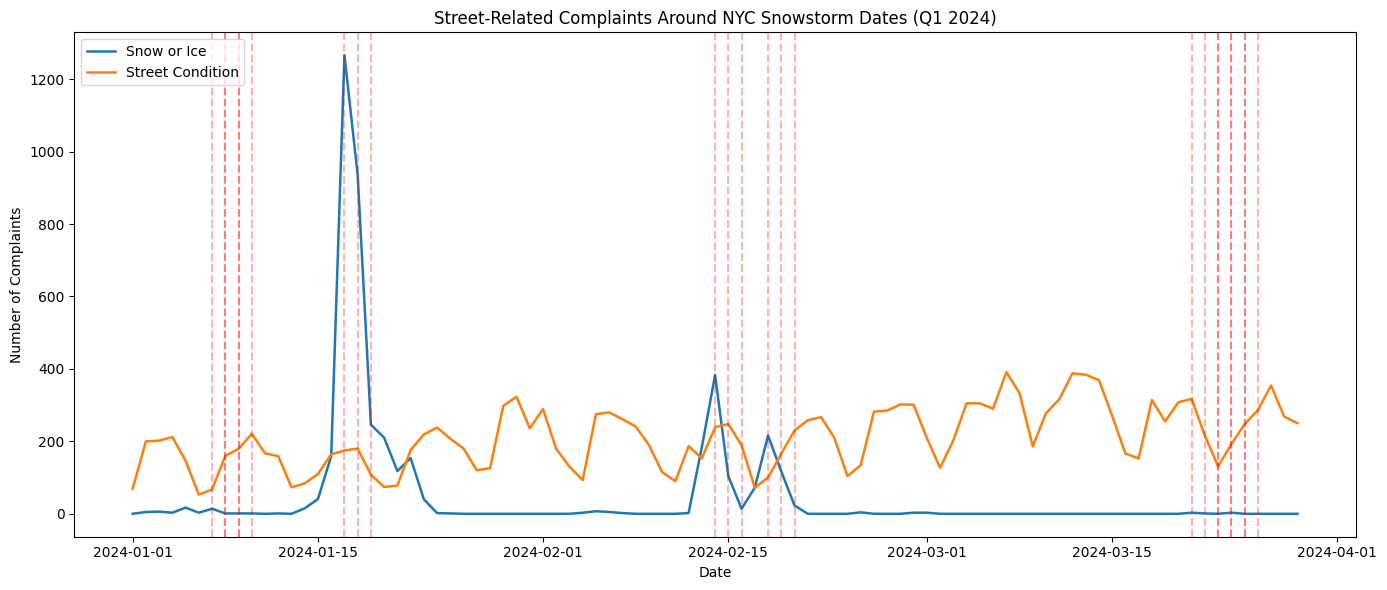

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# https://www.weather.gov/bgm/pastWinterJanuary072024

# snowstorm dates:
# january 6th - 7th
# january 16th
# february 13th
# february 17th
# march 22nd - 23rd
# march 20th (rain into snow, slippery roads and sidewalks)

import pandas as pd
import matplotlib.pyplot as plt
import datetime


df = pd.read_csv('/Users/sheerinraina/Downloads/311 Service Request 2024 Q1.csv', engine='python', on_bad_lines='skip', encoding='utf-8')
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Date'] = df['Created Date'].dt.date


complaints_of_interest = ['Snow or Ice', 'Street Condition']
df_filtered = df[df['Complaint Type'].isin(complaints_of_interest)]


daily_counts = df_filtered.groupby(['Date', 'Complaint Type']).size().unstack().fillna(0)


snowstorm_dates = [
    datetime.date(2024, 1, 6),
    datetime.date(2024, 1, 7),
    datetime.date(2024, 1, 16),
    datetime.date(2024, 2, 13),
    datetime.date(2024, 2, 17),
    datetime.date(2024, 3, 20),
    datetime.date(2024, 3, 22),
    datetime.date(2024, 3, 23),
]


plt.figure(figsize=(14, 6))

for complaint in complaints_of_interest:
    plt.plot(daily_counts.index, daily_counts[complaint], label=complaint, linewidth=1.8)


for storm_date in snowstorm_dates:
    for offset in range(1, 4):
        day = storm_date + datetime.timedelta(days=offset)
        plt.axvline(day, color='red', linestyle='--', alpha=0.3)

plt.title('Street-Related Complaints Around NYC Snowstorm Dates (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.legend()
plt.tight_layout()
plt.show()



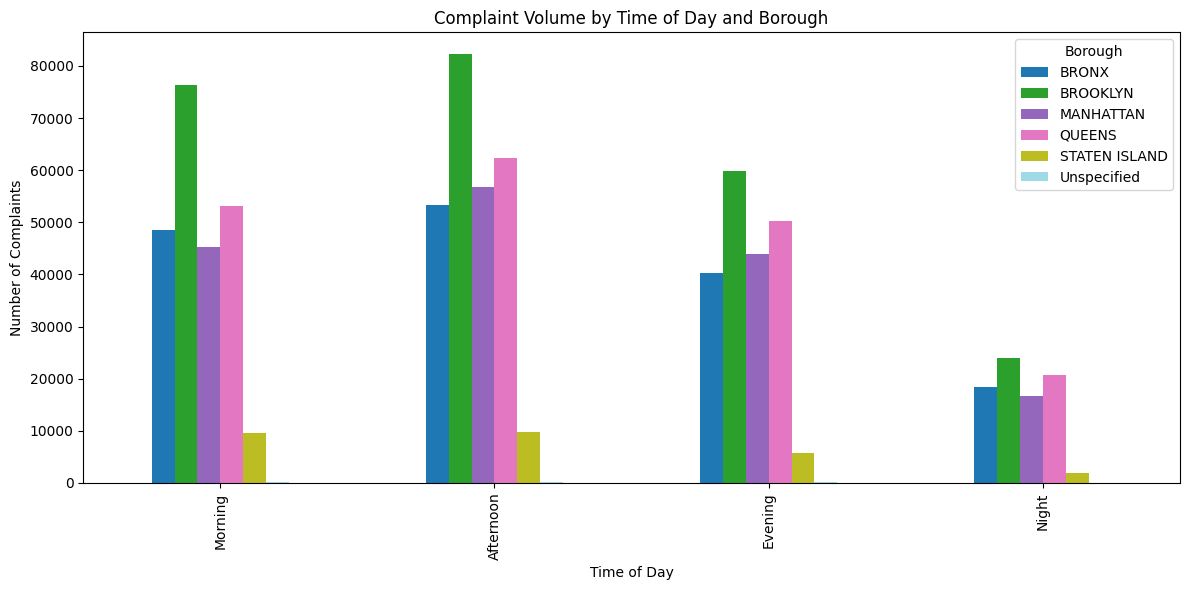

In [28]:
import matplotlib.pyplot as plt
import pandas as pd



df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Hour'] = df['Created Date'].dt.hour

def get_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time Period'] = df['Hour'].apply(get_time_period)


grouped = df.groupby(['Time Period', 'Borough']).size().unstack().fillna(0)


ordered_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
grouped = grouped.reindex(ordered_periods)


grouped.plot(kind='bar', figsize=(12, 6), colormap='tab20')

plt.title('Complaint Volume by Time of Day and Borough')
plt.xlabel('Time of Day')
plt.ylabel('Number of Complaints')
plt.legend(title='Borough')
plt.tight_layout()
plt.show()


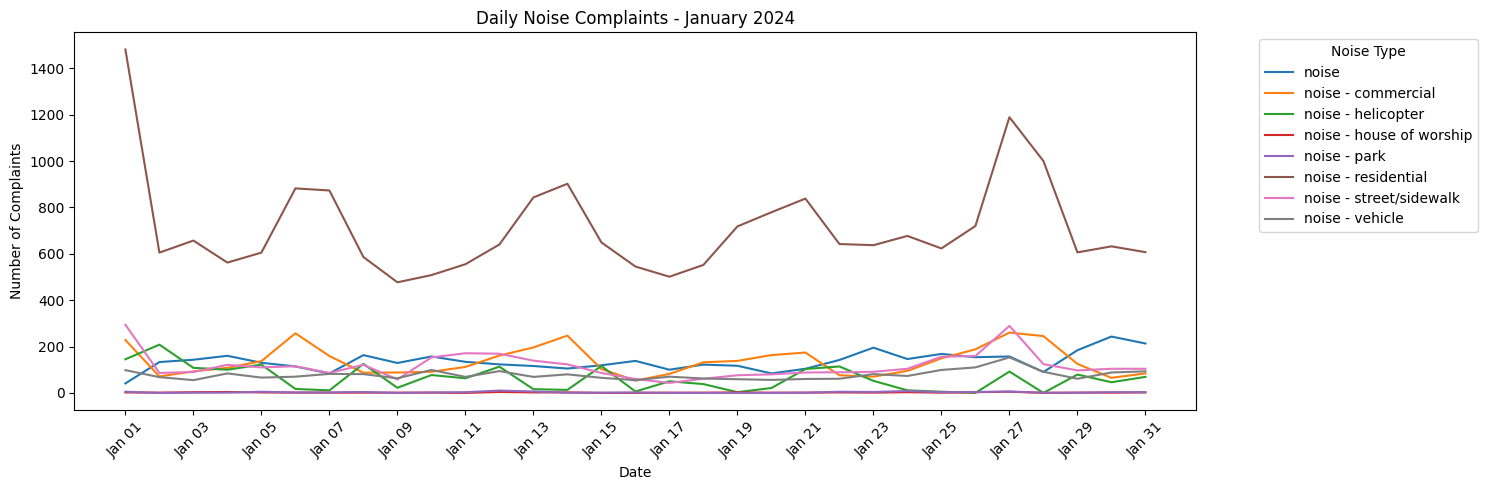

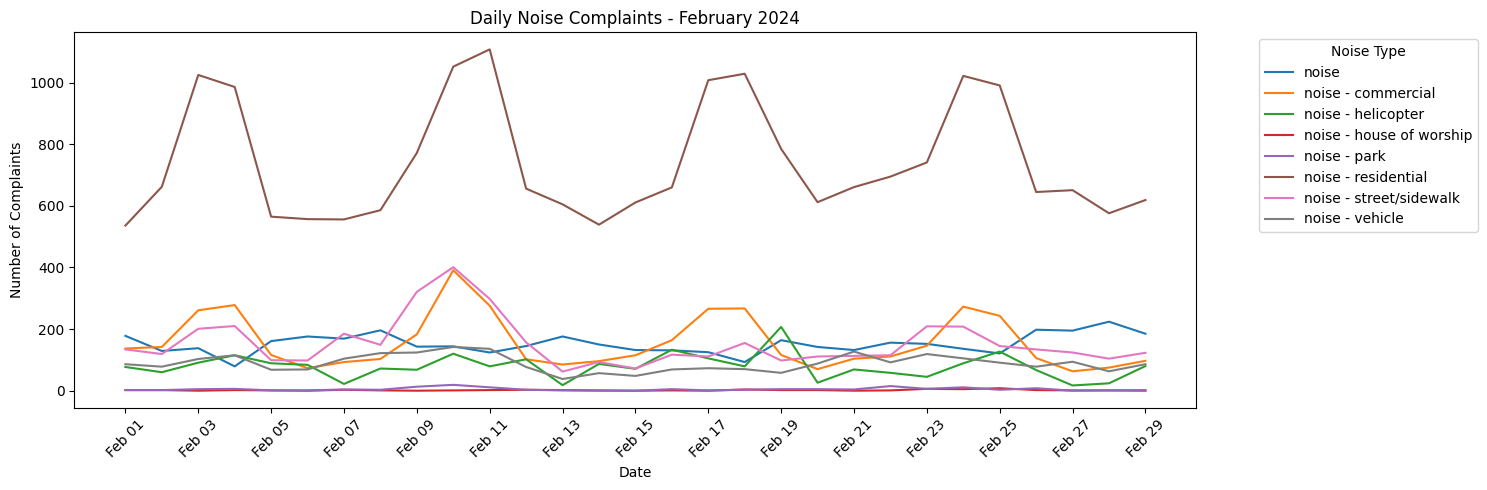

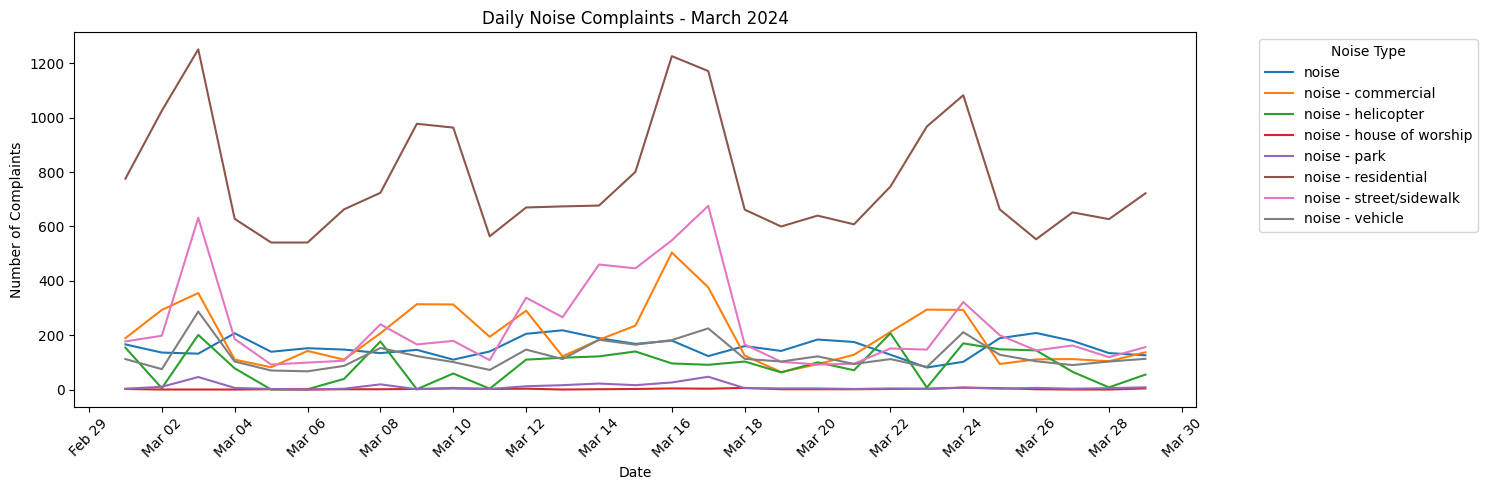

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Complaint Type'] = df['Complaint Type'].str.lower().str.strip()

noise_types = [
    'noise', 'noise - commercial', 'noise - helicopter',
    'noise - house of worship', 'noise - park',
    'noise - residential', 'noise - street/sidewalk', 'noise - vehicle'
]

noise_data = df[df['Complaint Type'].isin(noise_types)].copy()
noise_data['Date'] = noise_data['Created Date'].dt.floor('D')  # ensure datetime index

daily_counts = noise_data.groupby(['Date', 'Complaint Type']).size().unstack(fill_value=0)

jan = daily_counts.loc['2024-01-01':'2024-01-31']
feb = daily_counts.loc['2024-02-01':'2024-02-29']
mar = daily_counts.loc['2024-03-01':'2024-03-31']

def plot_month(data, title):
    plt.figure(figsize=(15, 5))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=45)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # every 2 days
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.legend(title="Noise Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_month(jan, "Daily Noise Complaints - January 2024")
plot_month(feb, "Daily Noise Complaints - February 2024")
plot_month(mar, "Daily Noise Complaints - March 2024")
